In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel('Datasets/products.xlsx')

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
df

,id,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
0,1,keyboard,Rs.70000,dell-d11,flat ten,0,1,3.8,Y,Noida,OneYr
1,2,mobile,80k,logitech K120,none,0,1,NaN,0,pune,NaN
2,3,headphone,100$,classmate,flat ten,1,0,4.5,1,Bangalore,1 year
3,4,accessories,"rs1,299",dell-d11,NaN,1,0,3,Y,Delhi,OneYr
4,5,books,899rs/-,classmate,NaN,0,0,4.5,1,Noida,OneYr
...,...,...,...,...,...,...,...,...,...,...,...
995,996,keyboard,80k,Samsung S-12,none,1,1,four,YES,pune,OneYr
996,997,tablet,80k,boAT-B19,upto 30%,1,1,five,yes,Hyderabad,12 months
997,998,tablet,100$,lenovo L11,none,0,0,3.8,YES,Bangalore,12 months
998,999,books,500rs+50$,classmate,flat ten,0,1,3,Y,mumbai,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   product      1000 non-null   object
 2   price        1000 non-null   object
 3   brand_model  893 non-null    object
 4   discount     881 non-null    object
 5   Amazon       1000 non-null   int64 
 6   Flipkart     1000 non-null   int64 
 7   rating       868 non-null    object
 8   stock        1000 non-null   object
 9   seller_city  1000 non-null   object
 10  warranty     683 non-null    object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [8]:
df.isnull().sum()

id               0
product          0
price            0
brand_model    107
discount       119
Amazon           0
Flipkart         0
rating         132
stock            0
seller_city      0
warranty       317
dtype: int64

In [9]:
df.duplicated().any()  
df.duplicated(subset='id').any()

False

In [10]:
df.columns

Index(['id', 'product', 'price', 'brand_model', 'discount', 'Amazon',
       'Flipkart', 'rating', 'stock', 'seller_city', 'warranty'],
      dtype='object')

In [11]:
df.columns[[3,4,10]]

Index(['brand_model', 'discount', 'warranty'], dtype='object')

In [12]:
for i in df.columns[[3,4,10]]:
    df[i]=df[i].fillna('Unknown')

# 1st method


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   product      1000 non-null   object
 2   price        1000 non-null   object
 3   brand_model  1000 non-null   object
 4   discount     1000 non-null   object
 5   Amazon       1000 non-null   int64 
 6   Flipkart     1000 non-null   int64 
 7   rating       868 non-null    object
 8   stock        1000 non-null   object
 9   seller_city  1000 non-null   object
 10  warranty     1000 non-null   object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [14]:
# df[df.columns[[3,4,10]]].fillna('Unknown')

# 2nd method

In [15]:
# df[['brand_model', 'discount', 'warranty']].fillna('Unknown')

In [16]:
df['rating'].unique()

array([3.8, nan, 4.5, 3, 'five', 'four', 5, 4.2], dtype=object)

In [17]:
df['rating']=df['rating'].replace({'five':5,'four':4}).astype(float).round(1)

In [18]:
df['rating'].unique()

array([3.8, nan, 4.5, 3. , 5. , 4. , 4.2])

<Axes: xlabel='rating'>

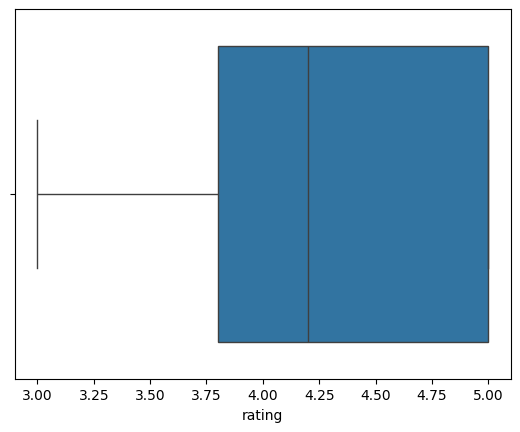

In [19]:
sns.boxplot(df,x='rating') #check for outlier if no outlier mean if outlier is there median and for cateigoral we use mode

In [20]:
df['rating']=df['rating'].fillna(df['rating'].mean()).round(1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   product      1000 non-null   object 
 2   price        1000 non-null   object 
 3   brand_model  1000 non-null   object 
 4   discount     1000 non-null   object 
 5   Amazon       1000 non-null   int64  
 6   Flipkart     1000 non-null   int64  
 7   rating       1000 non-null   float64
 8   stock        1000 non-null   object 
 9   seller_city  1000 non-null   object 
 10  warranty     1000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 86.1+ KB


In [22]:
df=df.set_index('id')

In [23]:
df

,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
id,,,,,,,,,,
1,keyboard,Rs.70000,dell-d11,flat ten,0,1,3.8,Y,Noida,OneYr
2,mobile,80k,logitech K120,none,0,1,4.2,0,pune,Unknown
3,headphone,100$,classmate,flat ten,1,0,4.5,1,Bangalore,1 year
4,accessories,"rs1,299",dell-d11,Unknown,1,0,3.0,Y,Delhi,OneYr
5,books,899rs/-,classmate,Unknown,0,0,4.5,1,Noida,OneYr
...,...,...,...,...,...,...,...,...,...,...
996,keyboard,80k,Samsung S-12,none,1,1,4.0,YES,pune,OneYr
997,tablet,80k,boAT-B19,upto 30%,1,1,5.0,yes,Hyderabad,12 months
998,tablet,100$,lenovo L11,none,0,0,3.8,YES,Bangalore,12 months


In [24]:
df.columns[[0,1,2,3,7]]

Index(['product', 'price', 'brand_model', 'discount', 'stock'], dtype='object')

In [25]:
for col in  df.columns[[0,1,2,3,7]]:
    print('-'*10,col,'-'*50)
    print(df[col].unique(),end='\n\n')
 
 

---------- product --------------------------------------------------
['keyboard' 'mobile' 'headphone' 'accessories' 'books' 'earphones'
 'laptop' 'tablet']

---------- price --------------------------------------------------
['Rs.70000' '80k' '100$' 'rs1,299' '899rs/-' '50$' 'USD 200' 15000
 '500rs+50$' 'one thousand rs' '15000rs + tax' 399 '50$+500rs' '100rs']

---------- brand_model --------------------------------------------------
['dell-d11' 'logitech K120' 'classmate' 'acer Aspire 5' 'vivo,V1.'
 'Unknown' 'apple-13' 'lenovo tab M10' 'samsung S12' 'boAT-B19' 'HP-H01'
 'samsung,s12' 'JBL_450BT' 'Mi-Cable' 'Samsung S-12' 'boAT-B11'
 'lenovo L11' 'boat b11' 'flat 10%' 'flat 20%' 'flat ten' 'upto 30%'
 'flat 15%']

---------- discount --------------------------------------------------
['flat ten' 'none' 'Unknown' 'flat 10%' 'upto 30%' '10 percent' 'flat 20%'
 0.2 'flat 15%' '0.2' 'HP-H01' 'JBL_450BT' 'samsung s12' 'samsung,s12']

---------- stock -------------------------------------

In [26]:
df['product']=df['product'].str.title()

In [27]:
df['stock']=df['stock'].replace({'yes':1,"Y":1,'no':0,'0':0,'1':1,'YES':1,'NO':0})

In [28]:
df.loc[df['discount'].isin(['HP-H01','JBL_450BT','samsung s12','samsung,s12'])]

,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
id,,,,,,,,,,
329,Headphone,"rs1,299",flat 10%,HP-H01,0,0,3.0,0,pune,Unknown
330,Headphone,100rs,flat 20%,JBL_450BT,1,0,5.0,1,delhi,12 months
380,Keyboard,one thousand rs,flat ten,samsung s12,1,1,5.0,0,Bangalore,6 months
381,Earphones,50$,upto 30%,"samsung,s12",0,0,4.2,0,BLR,12 months
382,Tablet,Rs.70000,flat 15%,"samsung,s12",1,0,3.8,1,bangalore,1 year


In [29]:
# def dis(row):
#     #scalar data both means not a collection its is primitive data
#     bm=row['brand_model']
#     d=row['discount']
#     if d in ['HP-H01','JBL_450BT','samsung s12','samsung,s12']:
#         return bm
#     else:
#         return d
# def brand(row):
#     #scalar data both means not a collection its is primitive data
#     bm=row['brand_model']
#     d=row['discount']
#     if bm in ['flat 10%','flat 20%','flat ten','upto 30%','flat 15%']:
#         return d
#     else:
#         return bm

In [30]:
# df.apply(dis,axis=1).unique()


In [31]:

# df.apply(brand,axis=1).unique()


In [32]:
def swap(row):
    #scalar data both means not a collection its is primitive data
    bm=row['brand_model']
    d=row['discount']
    if bm in ['flat 10%','flat 20%','flat ten','upto 30%','flat 15%']:
        return [d,bm]
    else:
        return [bm,d]


In [33]:
brand_dis_col=df.apply(swap,axis=1).astype(str).str.replace('[^A-Za-z0-9 ,%.-]',"",regex=True).str.rsplit(',',expand=True,n=1)

# here we use regualr expression here '^' after this what all we write all will these will exculed
brand_dis_col.head()

,0,1
id,,
1,dell-d11,flat ten
2,logitech K120,none
3,classmate,flat ten
4,dell-d11,Unknown
5,classmate,Unknown


In [34]:
df[['brand_model','discount']]=brand_dis_col

In [35]:
df['brand_model'].unique()

array(['dell-d11', 'logitech K120', 'classmate', 'acer Aspire 5',
       'vivo,V1.', 'Unknown', 'apple-13', 'lenovo tab M10', 'samsung S12',
       'boAT-B19', 'HP-H01', 'samsung,s12', 'JBL450BT', 'Mi-Cable',
       'Samsung S-12', 'boAT-B11', 'lenovo L11', 'boat b11',
       'samsung s12'], dtype=object)

In [36]:
df['discount'].unique()

array([' flat ten', ' none', ' Unknown', ' flat 10%', ' upto 30%',
       ' 10 percent', ' flat 20%', ' 0.2', ' flat 15%'], dtype=object)

In [37]:
#brand_dis_col=df.apply(swap,axis=1)  #o/p will in series of list
#brand_dis_col=brand_dis_col.astype(str)  #explict type converision
# --------------------------------------------------------------------------
#brand_dis_col=brand_dis_col.str.replace('[^A-Za-z0-9 ,.%]','',regex=TRue)
# removes the char which is not in the pattern\
# ==============================================================================

# df[['brand_model','discount']]=brand_dis_col.str.rsplit(','exapnd=True,n=1)
#split using comma and gives list --> expand=true converts the list elemnts to columns

In [38]:
df['brand_model'].unique()


array(['dell-d11', 'logitech K120', 'classmate', 'acer Aspire 5',
       'vivo,V1.', 'Unknown', 'apple-13', 'lenovo tab M10', 'samsung S12',
       'boAT-B19', 'HP-H01', 'samsung,s12', 'JBL450BT', 'Mi-Cable',
       'Samsung S-12', 'boAT-B11', 'lenovo L11', 'boat b11',
       'samsung s12'], dtype=object)

In [39]:
df['brand_model']=df['brand_model'].replace({'Samsung S-12':'Samsung S12'})


In [40]:
df['brand_model']=df['brand_model'].str.replace(' |,','-',regex=True,n=1)

In [41]:
df['brand_model'].unique()

array(['dell-d11', 'logitech-K120', 'classmate', 'acer-Aspire 5',
       'vivo-V1.', 'Unknown', 'apple-13', 'lenovo-tab M10', 'samsung-S12',
       'boAT-B19', 'HP-H01', 'samsung-s12', 'JBL450BT', 'Mi-Cable',
       'Samsung-S12', 'boAT-B11', 'lenovo-L11', 'boat-b11'], dtype=object)

In [42]:
df[['brand','model']]=df['brand_model'].str.split('-',expand=True).fillna("no model")

In [43]:
df=df.drop(columns='brand_model')

In [44]:
df

,product,price,discount,Amazon,Flipkart,rating,stock,seller_city,warranty,brand,model
id,,,,,,,,,,,
1,Keyboard,Rs.70000,flat ten,0,1,3.8,1,Noida,OneYr,dell,d11
2,Mobile,80k,none,0,1,4.2,0,pune,Unknown,logitech,K120
3,Headphone,100$,flat ten,1,0,4.5,1,Bangalore,1 year,classmate,no model
4,Accessories,"rs1,299",Unknown,1,0,3.0,1,Delhi,OneYr,dell,d11
5,Books,899rs/-,Unknown,0,0,4.5,1,Noida,OneYr,classmate,no model
...,...,...,...,...,...,...,...,...,...,...,...
996,Keyboard,80k,none,1,1,4.0,1,pune,OneYr,Samsung,S12
997,Tablet,80k,upto 30%,1,1,5.0,1,Hyderabad,12 months,boAT,B19
998,Tablet,100$,none,0,0,3.8,1,Bangalore,12 months,lenovo,L11


In [45]:
df['discount'].unique()

array([' flat ten', ' none', ' Unknown', ' flat 10%', ' upto 30%',
       ' 10 percent', ' flat 20%', ' 0.2', ' flat 15%'], dtype=object)

In [46]:
df['discount']=df['discount'].str.strip() #removes the spaces 

In [47]:
df['discount'].unique()

array(['flat ten', 'none', 'Unknown', 'flat 10%', 'upto 30%',
       '10 percent', 'flat 20%', '0.2', 'flat 15%'], dtype=object)

In [48]:
df['discount']=df['discount'].str.replace('ten','10%')

In [49]:
df['discount']=df['discount'].str.replace(' percent','%')

In [50]:
df['discount']=df['discount'].replace({'none':'No discount','Unknown':'No discount','0.2':'20%'})

In [51]:
df['discount'].unique()


array(['flat 10%', 'No discount', 'upto 30%', '10%', 'flat 20%', '20%',
       'flat 15%'], dtype=object)

In [52]:
# find the record which does not have flat attribute 

df.loc[~df['discount'].str.contains('flat')]

,product,price,discount,Amazon,Flipkart,rating,stock,seller_city,warranty,brand,model
id,,,,,,,,,,,
2,Mobile,80k,No discount,0,1,4.2,0,pune,Unknown,logitech,K120
4,Accessories,"rs1,299",No discount,1,0,3.0,1,Delhi,OneYr,dell,d11
5,Books,899rs/-,No discount,0,0,4.5,1,Noida,OneYr,classmate,no model
7,Earphones,Rs.70000,No discount,0,0,4.0,1,pune,1 year,vivo,V1.
8,Laptop,USD 200,No discount,0,1,3.0,1,Bangalore,OneYr,Unknown,no model
...,...,...,...,...,...,...,...,...,...,...,...
994,Laptop,15000,20%,0,1,4.2,0,bangalore,1 year,lenovo,L11
995,Mobile,"rs1,299",No discount,1,0,4.0,0,BLR,6 months,dell,d11
996,Keyboard,80k,No discount,1,1,4.0,1,pune,OneYr,Samsung,S12


In [53]:
dis=df.loc[~df['discount'].str.startswith(('upto','flat','No'),),'discount']
res='flat '+dis
df.loc[~df['discount'].str.startswith(('upto','flat','No'),),'discount']=res

In [54]:
df['discount'].unique()

array(['flat 10%', 'No discount', 'upto 30%', 'flat 20%', 'flat 15%'],
      dtype=object)

In [55]:
df['warranty'].unique()

array(['OneYr', 'Unknown', '1 year', '6 months', '12 months'],
      dtype=object)

In [56]:
df['warranty']=df['warranty'].replace({'OneYr':'12 months','1 year':'12 months'})

In [57]:
for col in ['brand','model']:
    df[col]=df[col].str.title()

In [58]:
df['seller_city'].unique()

array(['Noida', 'pune', 'Bangalore', 'Delhi', 'hyd', 'Mumbai', 'BLR',
       'Pune', 'Hyderabad', 'Chennai', 'delhi', 'bangalore', 'Kolkata',
       'mumbai'], dtype=object)

In [59]:
df['seller_city']=df['seller_city'].str.title()
df['seller_city']=df['seller_city'].replace({'Hyd':'Hyderabad','Blr':'Bangalore'})


In [60]:
df['price'].unique()

array(['Rs.70000', '80k', '100$', 'rs1,299', '899rs/-', '50$', 'USD 200',
       15000, '500rs+50$', 'one thousand rs', '15000rs + tax', 399,
       '50$+500rs', '100rs'], dtype=object)

In [61]:
df['price']=df['price'].astype(str) #in excel we can multiple data types 

In [62]:
df['price']=df['price'].replace({'one thousand rs':'1000'})

In [63]:
df['price'].str.replace('rs|Rs.|/-| tax',"",regex=True).unique()

array(['70000', '80k', '100$', '1,299', '899', '50$', 'USD 200', '15000',
       '500+50$', '1000', '15000 +', '399', '50$+500', '100'],
      dtype=object)

In [64]:
df['price']=df['price'].str.replace('rs|Rs.|/-| tax| |,',"",regex=True).str.strip(' +')


In [65]:
df['price'].unique()

array(['70000', '80k', '100$', '1299', '899', '50$', 'USD200', '15000',
       '500+50$', '1000', '399', '50$+500', '100'], dtype=object)

In [66]:
df['price']=df['price'].str.replace('USD','$',regex=True,case=False)

In [67]:
df['price']=df['price'].str.replace('k','000',regex=True,case=False)


In [68]:
def conv(p):
    dol=90
    if  '+' in  p:
         L=p.split('+')
         if L[0].isdigit():  
            v1=float(L[0])
         elif '$' in L[0]:
            v1=float(L[0].strip('$'))*dol

         if L[1].isdigit():
            v2=float(L[1])
         elif '$' in L[1]:
            v2=float(L[1].strip('$'))*dol
         return v1+v2
    elif '$' in p:
       return float(p.strip('$'))*dol
    else:
        return float(p)





In [69]:
df['price']=df['price'].apply(conv).astype(int)

In [70]:
df['price'].unique()

array([70000, 80000,  9000,  1299,   899,  4500, 18000, 15000,  5000,
        1000,   399,   100])

In [71]:
df

,product,price,discount,Amazon,Flipkart,rating,stock,seller_city,warranty,brand,model
id,,,,,,,,,,,
1,Keyboard,70000,flat 10%,0,1,3.8,1,Noida,12 months,Dell,D11
2,Mobile,80000,No discount,0,1,4.2,0,Pune,Unknown,Logitech,K120
3,Headphone,9000,flat 10%,1,0,4.5,1,Bangalore,12 months,Classmate,No Model
4,Accessories,1299,No discount,1,0,3.0,1,Delhi,12 months,Dell,D11
5,Books,899,No discount,0,0,4.5,1,Noida,12 months,Classmate,No Model
...,...,...,...,...,...,...,...,...,...,...,...
996,Keyboard,80000,No discount,1,1,4.0,1,Pune,12 months,Samsung,S12
997,Tablet,80000,upto 30%,1,1,5.0,1,Hyderabad,12 months,Boat,B19
998,Tablet,9000,No discount,0,0,3.8,1,Bangalore,12 months,Lenovo,L11


In [72]:
df.columns

col=['product', 'price', 'discount', 'rating', 'stock',
       'seller_city', 'warranty', 'brand', 'model']

In [73]:
df1=pd.melt(df,id_vars=col,value_vars=['Amazon','Flipkart'],var_name='shopping app',value_name='availability')

In [74]:
df1=df1.loc[df1['availability']==1].reset_index(drop=True).drop(columns='availability')

In [75]:
df1

,product,price,discount,rating,stock,seller_city,warranty,brand,model,shopping app
0,Headphone,9000,flat 10%,4.5,1,Bangalore,12 months,Classmate,No Model,Amazon
1,Accessories,1299,No discount,3.0,1,Delhi,12 months,Dell,D11,Amazon
2,Accessories,4500,upto 30%,5.0,1,Hyderabad,Unknown,Dell,D11,Amazon
3,Headphone,5000,flat 20%,3.8,1,Mumbai,Unknown,Samsung,S12,Amazon
4,Keyboard,899,flat 20%,3.8,1,Bangalore,12 months,Logitech,K120,Amazon
...,...,...,...,...,...,...,...,...,...,...
1009,Laptop,15000,flat 20%,4.2,0,Bangalore,12 months,Lenovo,L11,Flipkart
1010,Keyboard,80000,No discount,4.0,1,Pune,12 months,Samsung,S12,Flipkart
1011,Tablet,80000,upto 30%,5.0,1,Hyderabad,12 months,Boat,B19,Flipkart
1012,Books,5000,flat 10%,3.0,1,Mumbai,Unknown,Classmate,No Model,Flipkart


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       1014 non-null   object 
 1   price         1014 non-null   int32  
 2   discount      1014 non-null   object 
 3   rating        1014 non-null   float64
 4   stock         1014 non-null   int64  
 5   seller_city   1014 non-null   object 
 6   warranty      1014 non-null   object 
 7   brand         1014 non-null   object 
 8   model         1014 non-null   object 
 9   shopping app  1014 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 75.4+ KB


In [77]:
# 1.which city is selling more products?
df1['seller_city'].value_counts()

seller_city
Bangalore    235
Delhi        175
Pune         155
Hyderabad    146
Mumbai       128
Chennai       68
Kolkata       54
Noida         53
Name: count, dtype: int64

In [78]:
df1['seller_city'].value_counts().head(1)


# Bangalore is the top selling city, having the highest number of products listed

seller_city
Bangalore    235
Name: count, dtype: int64

In [79]:
#2.which shopping app has more products?
df1['shopping app'].value_counts().head(1)


#amazon has more products listed compared to filpkart 

shopping app
Amazon    517
Name: count, dtype: int64

In [80]:
#3.get the occurrence of products?
df1['product'].value_counts()


# Earphones have the highest occurenece(150), while headphones have the lowest occurenece(104) among all the products

product
Earphones      150
Mobile         138
Keyboard       131
Tablet         130
Laptop         124
Accessories    120
Books          117
Headphone      104
Name: count, dtype: int64

In [81]:
# 4. which product is available in both Amazon and Flipkart?
df1.groupby('product')['shopping app'].unique()


#all the below listed products are avaialbel in both amazon and filkart

product
Accessories    [Amazon, Flipkart]
Books          [Amazon, Flipkart]
Earphones      [Amazon, Flipkart]
Headphone      [Amazon, Flipkart]
Keyboard       [Amazon, Flipkart]
Laptop         [Amazon, Flipkart]
Mobile         [Amazon, Flipkart]
Tablet         [Amazon, Flipkart]
Name: shopping app, dtype: object

In [82]:
# 5. what type of products have warranty.

df1.loc[df1['warranty'] != 'Unknown']



,product,price,discount,rating,stock,seller_city,warranty,brand,model,shopping app
0,Headphone,9000,flat 10%,4.5,1,Bangalore,12 months,Classmate,No Model,Amazon
1,Accessories,1299,No discount,3.0,1,Delhi,12 months,Dell,D11,Amazon
4,Keyboard,899,flat 20%,3.8,1,Bangalore,12 months,Logitech,K120,Amazon
5,Earphones,80000,flat 20%,3.8,0,Delhi,12 months,Unknown,No Model,Amazon
7,Headphone,399,No discount,4.2,1,Pune,12 months,Acer,Aspire 5,Amazon
...,...,...,...,...,...,...,...,...,...,...
1007,Accessories,399,flat 10%,4.2,1,Delhi,12 months,Classmate,No Model,Flipkart
1008,Laptop,1299,flat 10%,5.0,1,Bangalore,6 months,Boat,B11,Flipkart
1009,Laptop,15000,flat 20%,4.2,0,Bangalore,12 months,Lenovo,L11,Flipkart
1010,Keyboard,80000,No discount,4.0,1,Pune,12 months,Samsung,S12,Flipkart


In [83]:
df['warranty'].unique()

array(['12 months', 'Unknown', '6 months'], dtype=object)

In [84]:
df1.loc[df1['warranty'] != 'Unknown','product'].unique()

#products listed below are the products having warranty among all the products

array(['Headphone', 'Accessories', 'Keyboard', 'Earphones', 'Laptop',
       'Books', 'Tablet', 'Mobile'], dtype=object)

In [85]:
# 6.get product wise occurrence of brand
df1.groupby('product')['brand']

In [86]:
df1.groupby('product')['brand'].value_counts()


product      brand    
Accessories  Lenovo       17
             Boat         12
             Acer         11
             Dell         11
             Hp           10
                          ..
Tablet       Apple         6
             Mi            4
             Classmate     2
             Dell          2
             Hp            2
Name: count, Length: 104, dtype: int64

In [87]:
# 7. get the product which has either highest or lowest price.

df1.loc[df1['price'].idxmax(),'product']

#earphones have the highest price ,while accessories have the lowest price among all the products


'Earphones'

In [88]:
df1.loc[df['price'].idxmin(),'product']


'Accessories'

In [ ]:
# 8. if common product is available, then check who is giving more discount


In [90]:
df1

,product,price,discount,rating,stock,seller_city,warranty,brand,model,shopping app
0,Headphone,9000,flat 10%,4.5,1,Bangalore,12 months,Classmate,No Model,Amazon
1,Accessories,1299,No discount,3.0,1,Delhi,12 months,Dell,D11,Amazon
2,Accessories,4500,upto 30%,5.0,1,Hyderabad,Unknown,Dell,D11,Amazon
3,Headphone,5000,flat 20%,3.8,1,Mumbai,Unknown,Samsung,S12,Amazon
4,Keyboard,899,flat 20%,3.8,1,Bangalore,12 months,Logitech,K120,Amazon
...,...,...,...,...,...,...,...,...,...,...
1009,Laptop,15000,flat 20%,4.2,0,Bangalore,12 months,Lenovo,L11,Flipkart
1010,Keyboard,80000,No discount,4.0,1,Pune,12 months,Samsung,S12,Flipkart
1011,Tablet,80000,upto 30%,5.0,1,Hyderabad,12 months,Boat,B19,Flipkart
1012,Books,5000,flat 10%,3.0,1,Mumbai,Unknown,Classmate,No Model,Flipkart


In [91]:
#9. get the sales(prize) of product for each shopping app



In [92]:
import matplotlib.pyplot as plt
import seaborn as sns



In [93]:
df1['price'].unique()

array([ 9000,  1299,  4500,  5000,   899, 80000, 15000,   399, 18000,
       70000,   100,  1000])

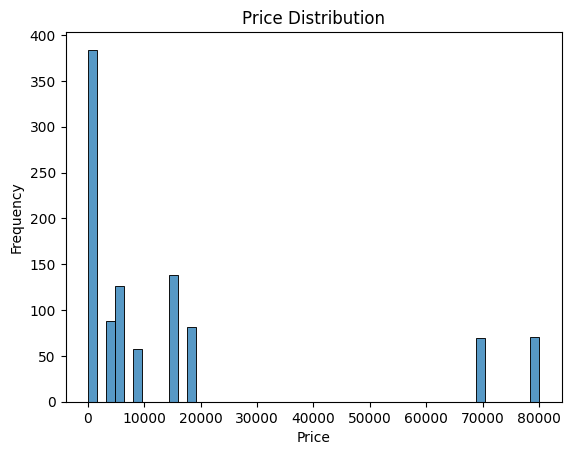

In [94]:
# 10. get the distribution of (i) price and (ii) rating



sns.histplot(df1['price'], bins=50)

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



#in this histplot we can see that majority of products lies in lower range and as the x -axis(price )the products frq decrese

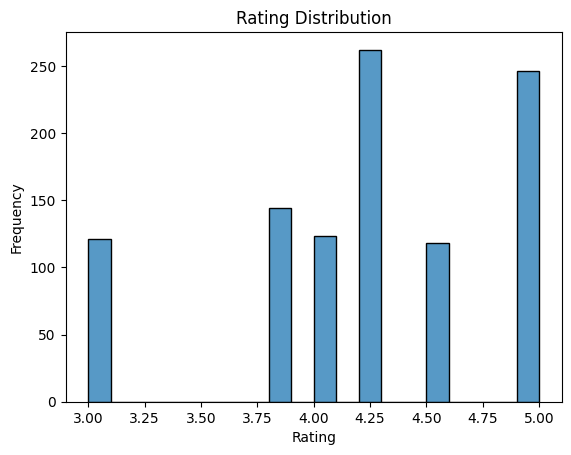

In [95]:

sns.histplot(df1['rating'], bins=20)

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()



# most of the products rating lies between 4.0 and 5.0 this is showing that customer have postive feedback

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       1014 non-null   object 
 1   price         1014 non-null   int32  
 2   discount      1014 non-null   object 
 3   rating        1014 non-null   float64
 4   stock         1014 non-null   int64  
 5   seller_city   1014 non-null   object 
 6   warranty      1014 non-null   object 
 7   brand         1014 non-null   object 
 8   model         1014 non-null   object 
 9   shopping app  1014 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 75.4+ KB


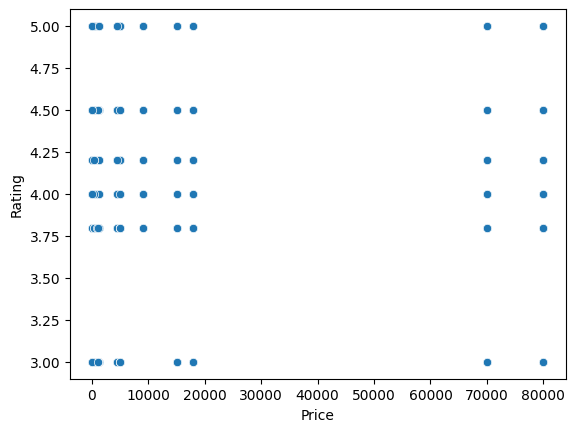

In [97]:
# 11. get the relationship b/w price and rating


sns.scatterplot(x=df1['price'], y=df1['rating'])


plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


#there is no strong linear reationship b/w price and rating , as high and low price both have wide range of rating


In [98]:
# 12. get the correlation b/w price and rating

df['price'].corr(df['rating'])

#the correlation between price and rating is very close to 0 so there no reatiionship between price and rating

-0.0072249716134134955

<Axes: xlabel='price', ylabel='rating'>

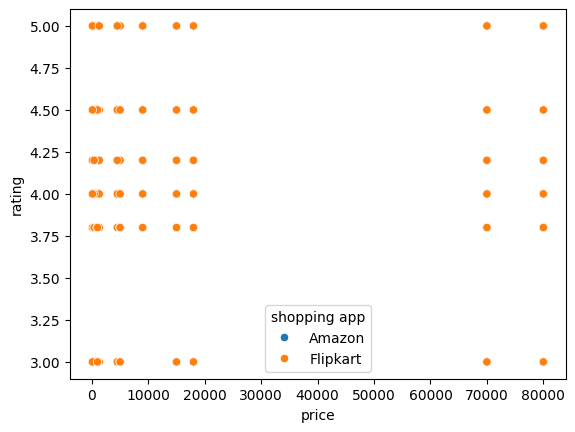

In [99]:
# 13. get the relationship b/w price and rating for each shopping app

sns.scatterplot(df1, x='price', y='rating', hue='shopping app')


# majority of rating overlap on each other and filkart has more datapoints causing amzon points to overalap or not seen in scatter plot

In [100]:
# 14. get the correlation b/w price and rating for each shopping app

# df['price'].corr(df['rating']).groupby('shopping app')